# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [3]:
resource_name='hpi'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
geoid,string,ACS format geoid
pop2010,integer,total population of census tract in 2010
pct2010gq,number,population in group quarters in 2010
city,text,City associated with centroid of census tract
zip,integer,5-digit postal zip code
county_fips,integer,4-digit code of county
county_name,string,Name of county
urbantype,string,Census classification of urban type
hpi2score,number,Total score of HPI
hpi2_pctile_pos,number,Percentile ranking of HPI score (positive frame)


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,geoid,pop2010,pct2010gq,city,zip,county_fips,county_name,urbantype,hpi2score,hpi2_pctile_pos,...,leb_pctile,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,nativeam_pct,pacificisl_pct,other_pct,version
0,14000US06001400100,2937,0.1,Oakland,94704.0,6001,Alameda,urban_area,1.182028,99.114590,...,96.663673,71.605789,4.824259,15.713301,4.031702,3.824948,0.0,0.0,0,Wed13Dec17
1,14000US06001400200,1974,3.5,Oakland,94618.0,6001,Alameda,urban_area,1.325874,99.704863,...,96.612344,83.884970,0.000000,7.921867,8.193163,0.000000,0.0,0.0,0,Wed13Dec17
2,14000US06001400300,4865,0.8,Oakland,94618.0,6001,Alameda,urban_area,0.925666,95.932247,...,95.136661,67.384106,10.596026,8.671358,8.257450,5.091060,0.0,0.0,0,Wed13Dec17
3,14000US06001400400,3703,0.9,Oakland,94609.0,6001,Alameda,urban_area,1.117603,98.537149,...,68.959322,66.031054,12.203759,7.354944,9.043857,5.366385,0.0,0.0,0,Wed13Dec17
4,14000US06001400500,3517,3.6,Oakland,94609.0,6001,Alameda,urban_area,0.562799,83.318363,...,38.855383,51.180196,26.856649,5.987334,9.786989,6.188831,0.0,0.0,0,Wed13Dec17


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,1
datetime,0
number,85
other,5


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0
version,Wed13Dec17


# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 85 columns):
pop2010                    8057 non-null int64
pct2010gq                  8024 non-null float64
zip                        8035 non-null float64
county_fips                8057 non-null int64
hpi2score                  7793 non-null float64
hpi2_pctile_pos            7793 non-null float64
hpi2_pctile_neg            7793 non-null float64
quintiles                  7793 non-null float64
quartiles                  7793 non-null float64
economic                   7793 non-null float64
economic_pctile            7793 non-null float64
education                  7793 non-null float64
education_pctile           7793 non-null float64
housing                    7793 non-null float64
houseing_pctile            7793 non-null float64
healthcareaccess           7793 non-null float64
healthcareaccess_pctile    7793 non-null float64
neighborhood               7793 non-null float64
neighborhood_pc

None

,count,mean,std,min,25%,50%,75%,max
pop2010,8057.0,4.623800e+03,1984.696591,0.000000,3350.000000,4409.000000,5651.000000,37452.000000
pct2010gq,8024.0,2.307515e+00,9.574740,0.000000,0.000000,0.300000,1.100000,100.000000
zip,8035.0,9.283661e+04,3445.164575,32.000000,91602.000000,92691.000000,94558.000000,96161.000000
county_fips,8057.0,6.054691e+03,26.609992,6001.000000,6037.000000,6059.000000,6073.000000,6115.000000
hpi2score,7793.0,2.438093e-12,0.548753,-1.994633,-0.409329,0.007771,0.410343,1.532227
hpi2_pctile_pos,7793.0,5.000642e+01,28.869366,0.012832,25.009624,50.006416,75.003208,100.000000
hpi2_pctile_neg,7793.0,4.999358e+01,28.869366,0.000000,24.996792,49.993584,74.990376,99.987168
quintiles,7793.0,3.000000e+00,1.414123,1.000000,2.000000,3.000000,4.000000,5.000000
quartiles,7793.0,2.500064e+00,1.118048,1.000000,2.000000,3.000000,3.000000,4.000000
economic,7793.0,5.646099e-12,0.870467,-2.772752,-0.647621,0.027364,0.655630,2.453069


## Distributions

In [33]:
def plot_histograms(df):

    col_names = tuple(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


/Users/eric/proj/virt/planning/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


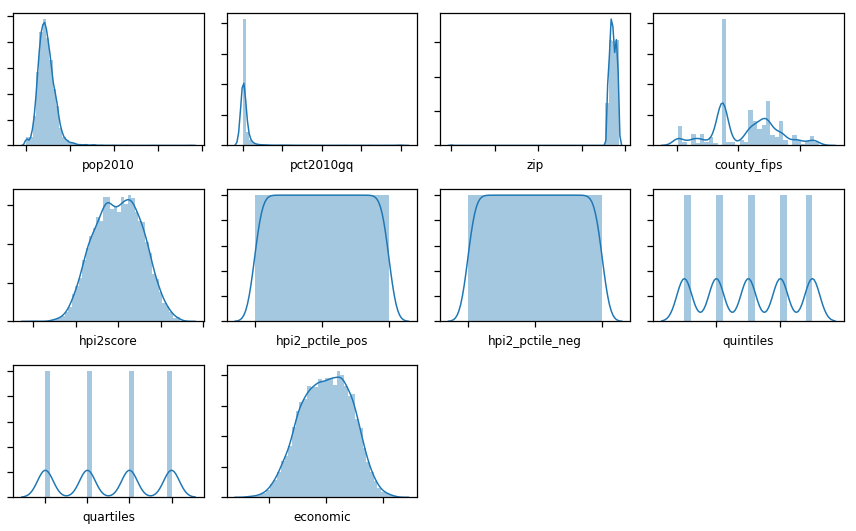

In [34]:
plot_histograms(df[number_col_names[0:10]])

/Users/eric/proj/virt/planning/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


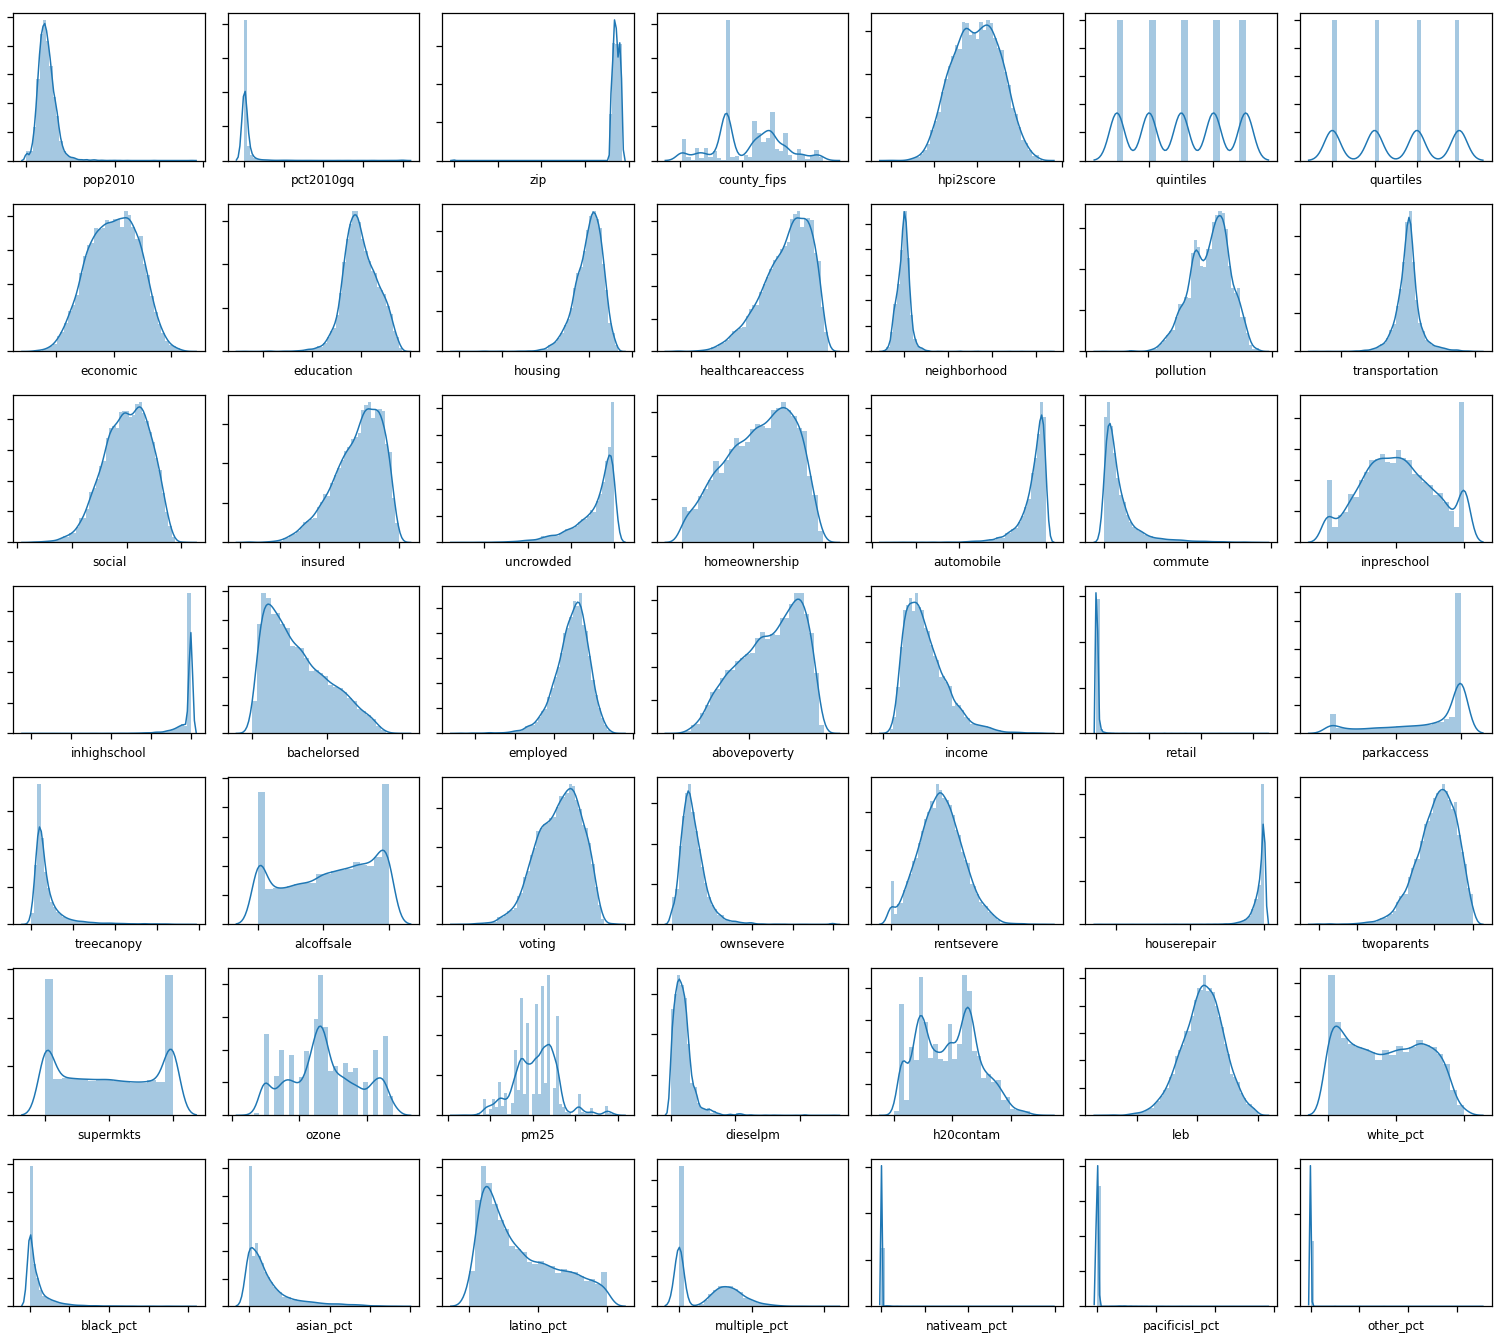

In [24]:
plot_histograms( df[[ c for c in number_col_names if 'pctile' not in c ]])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

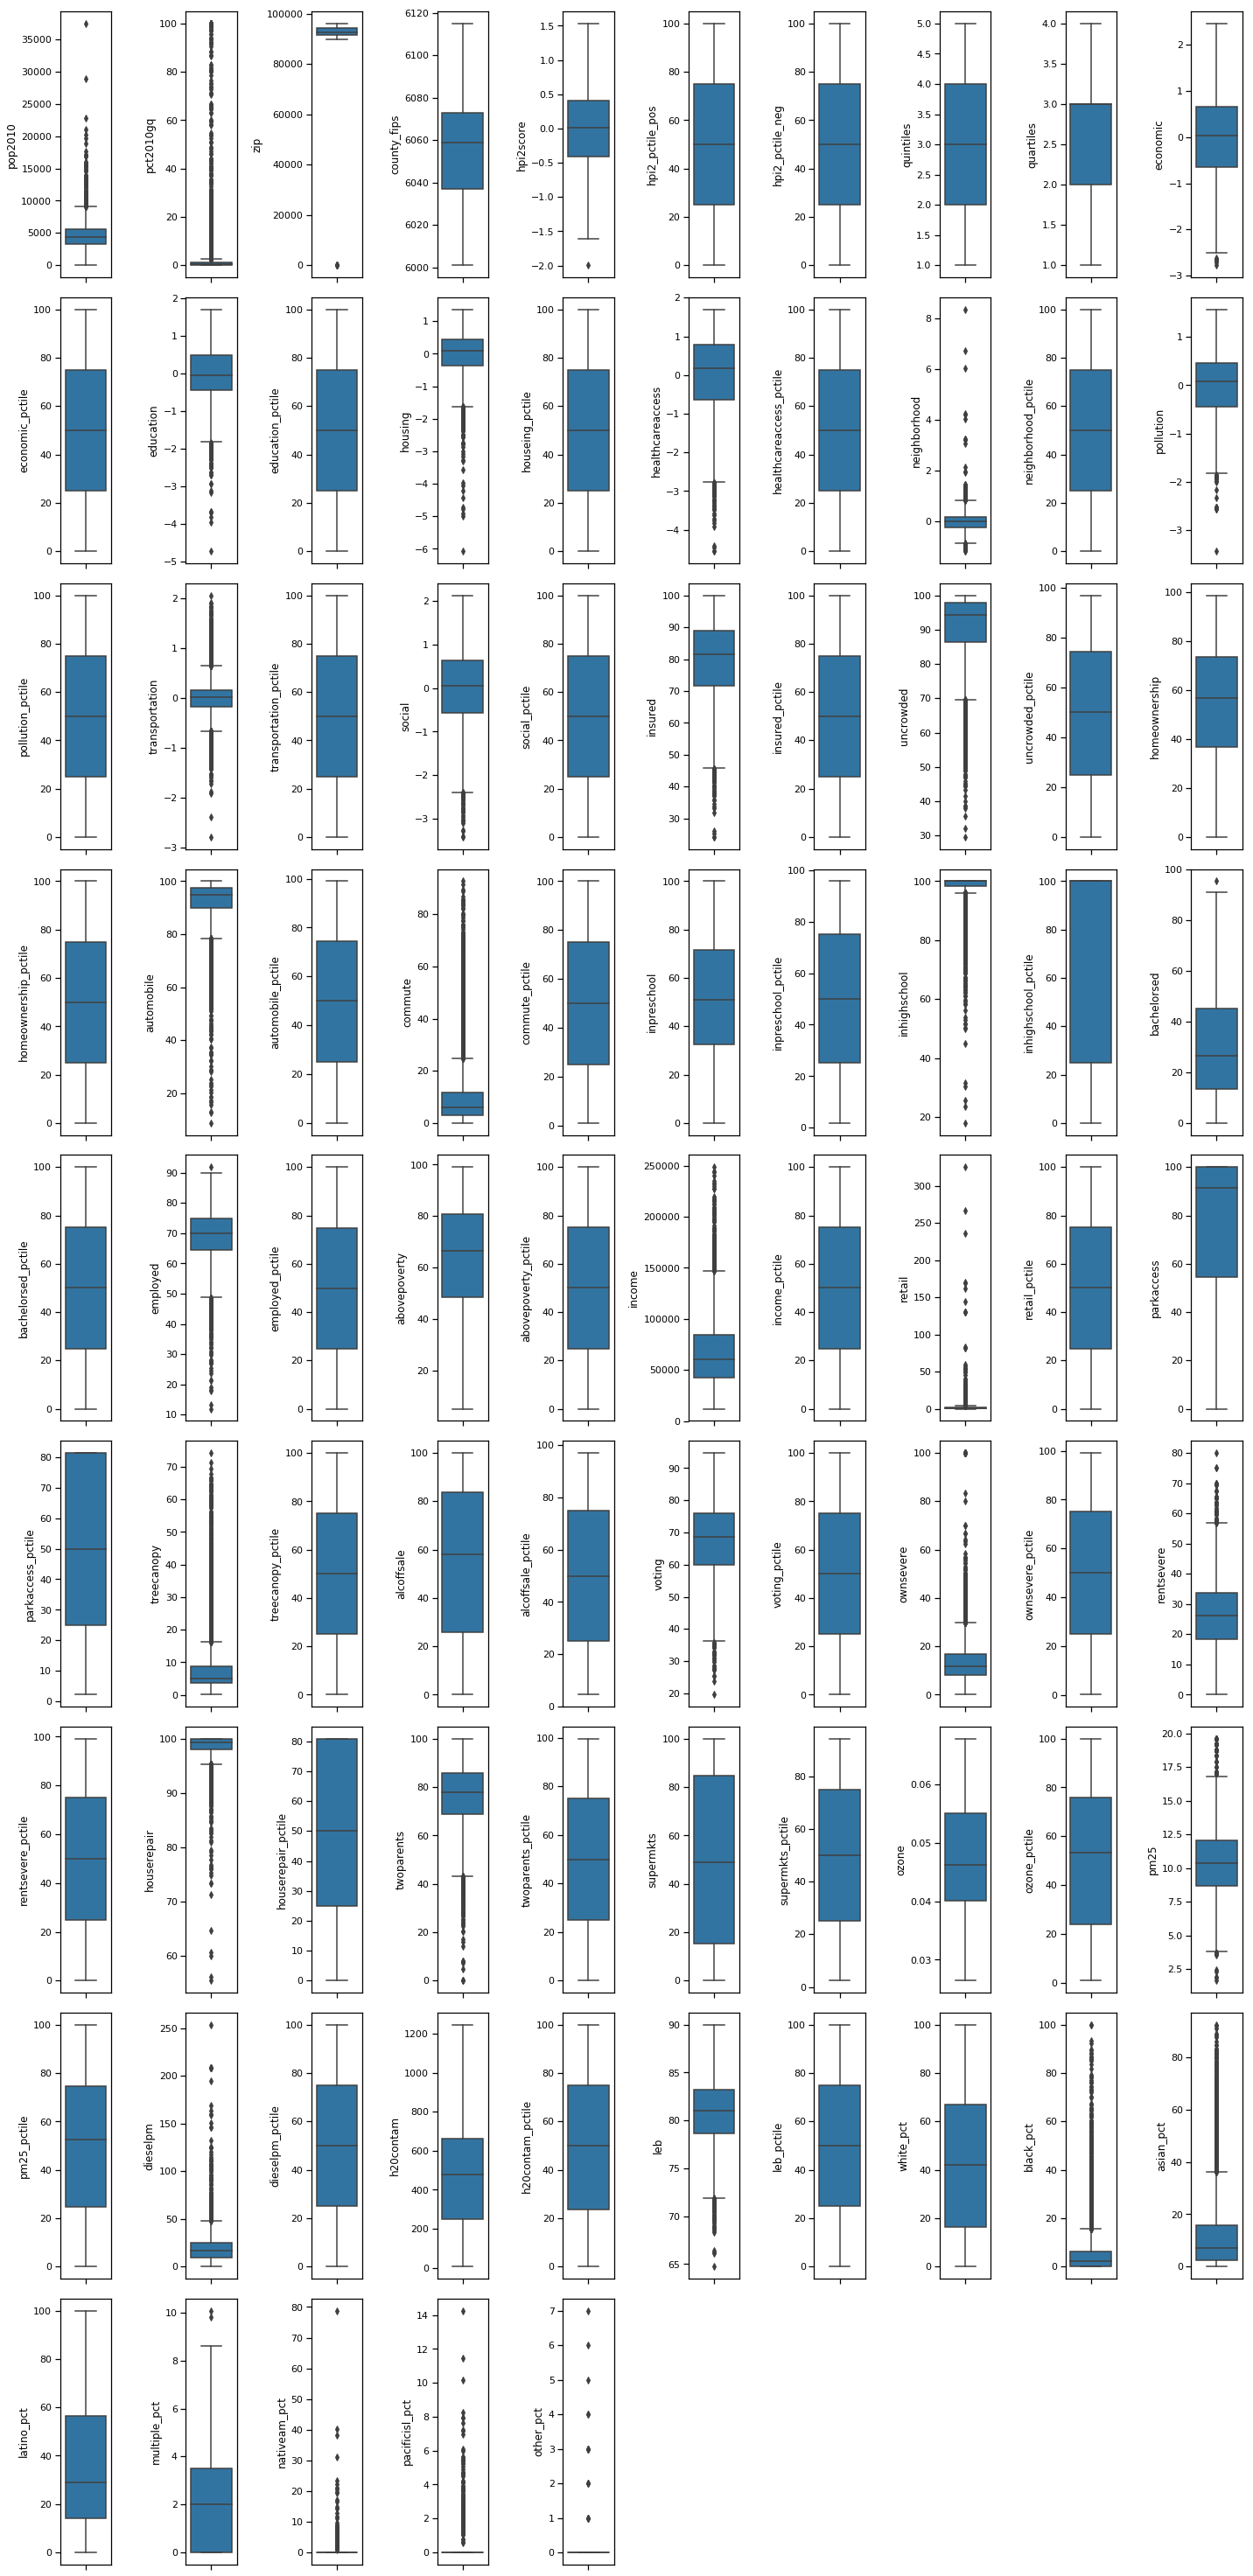

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

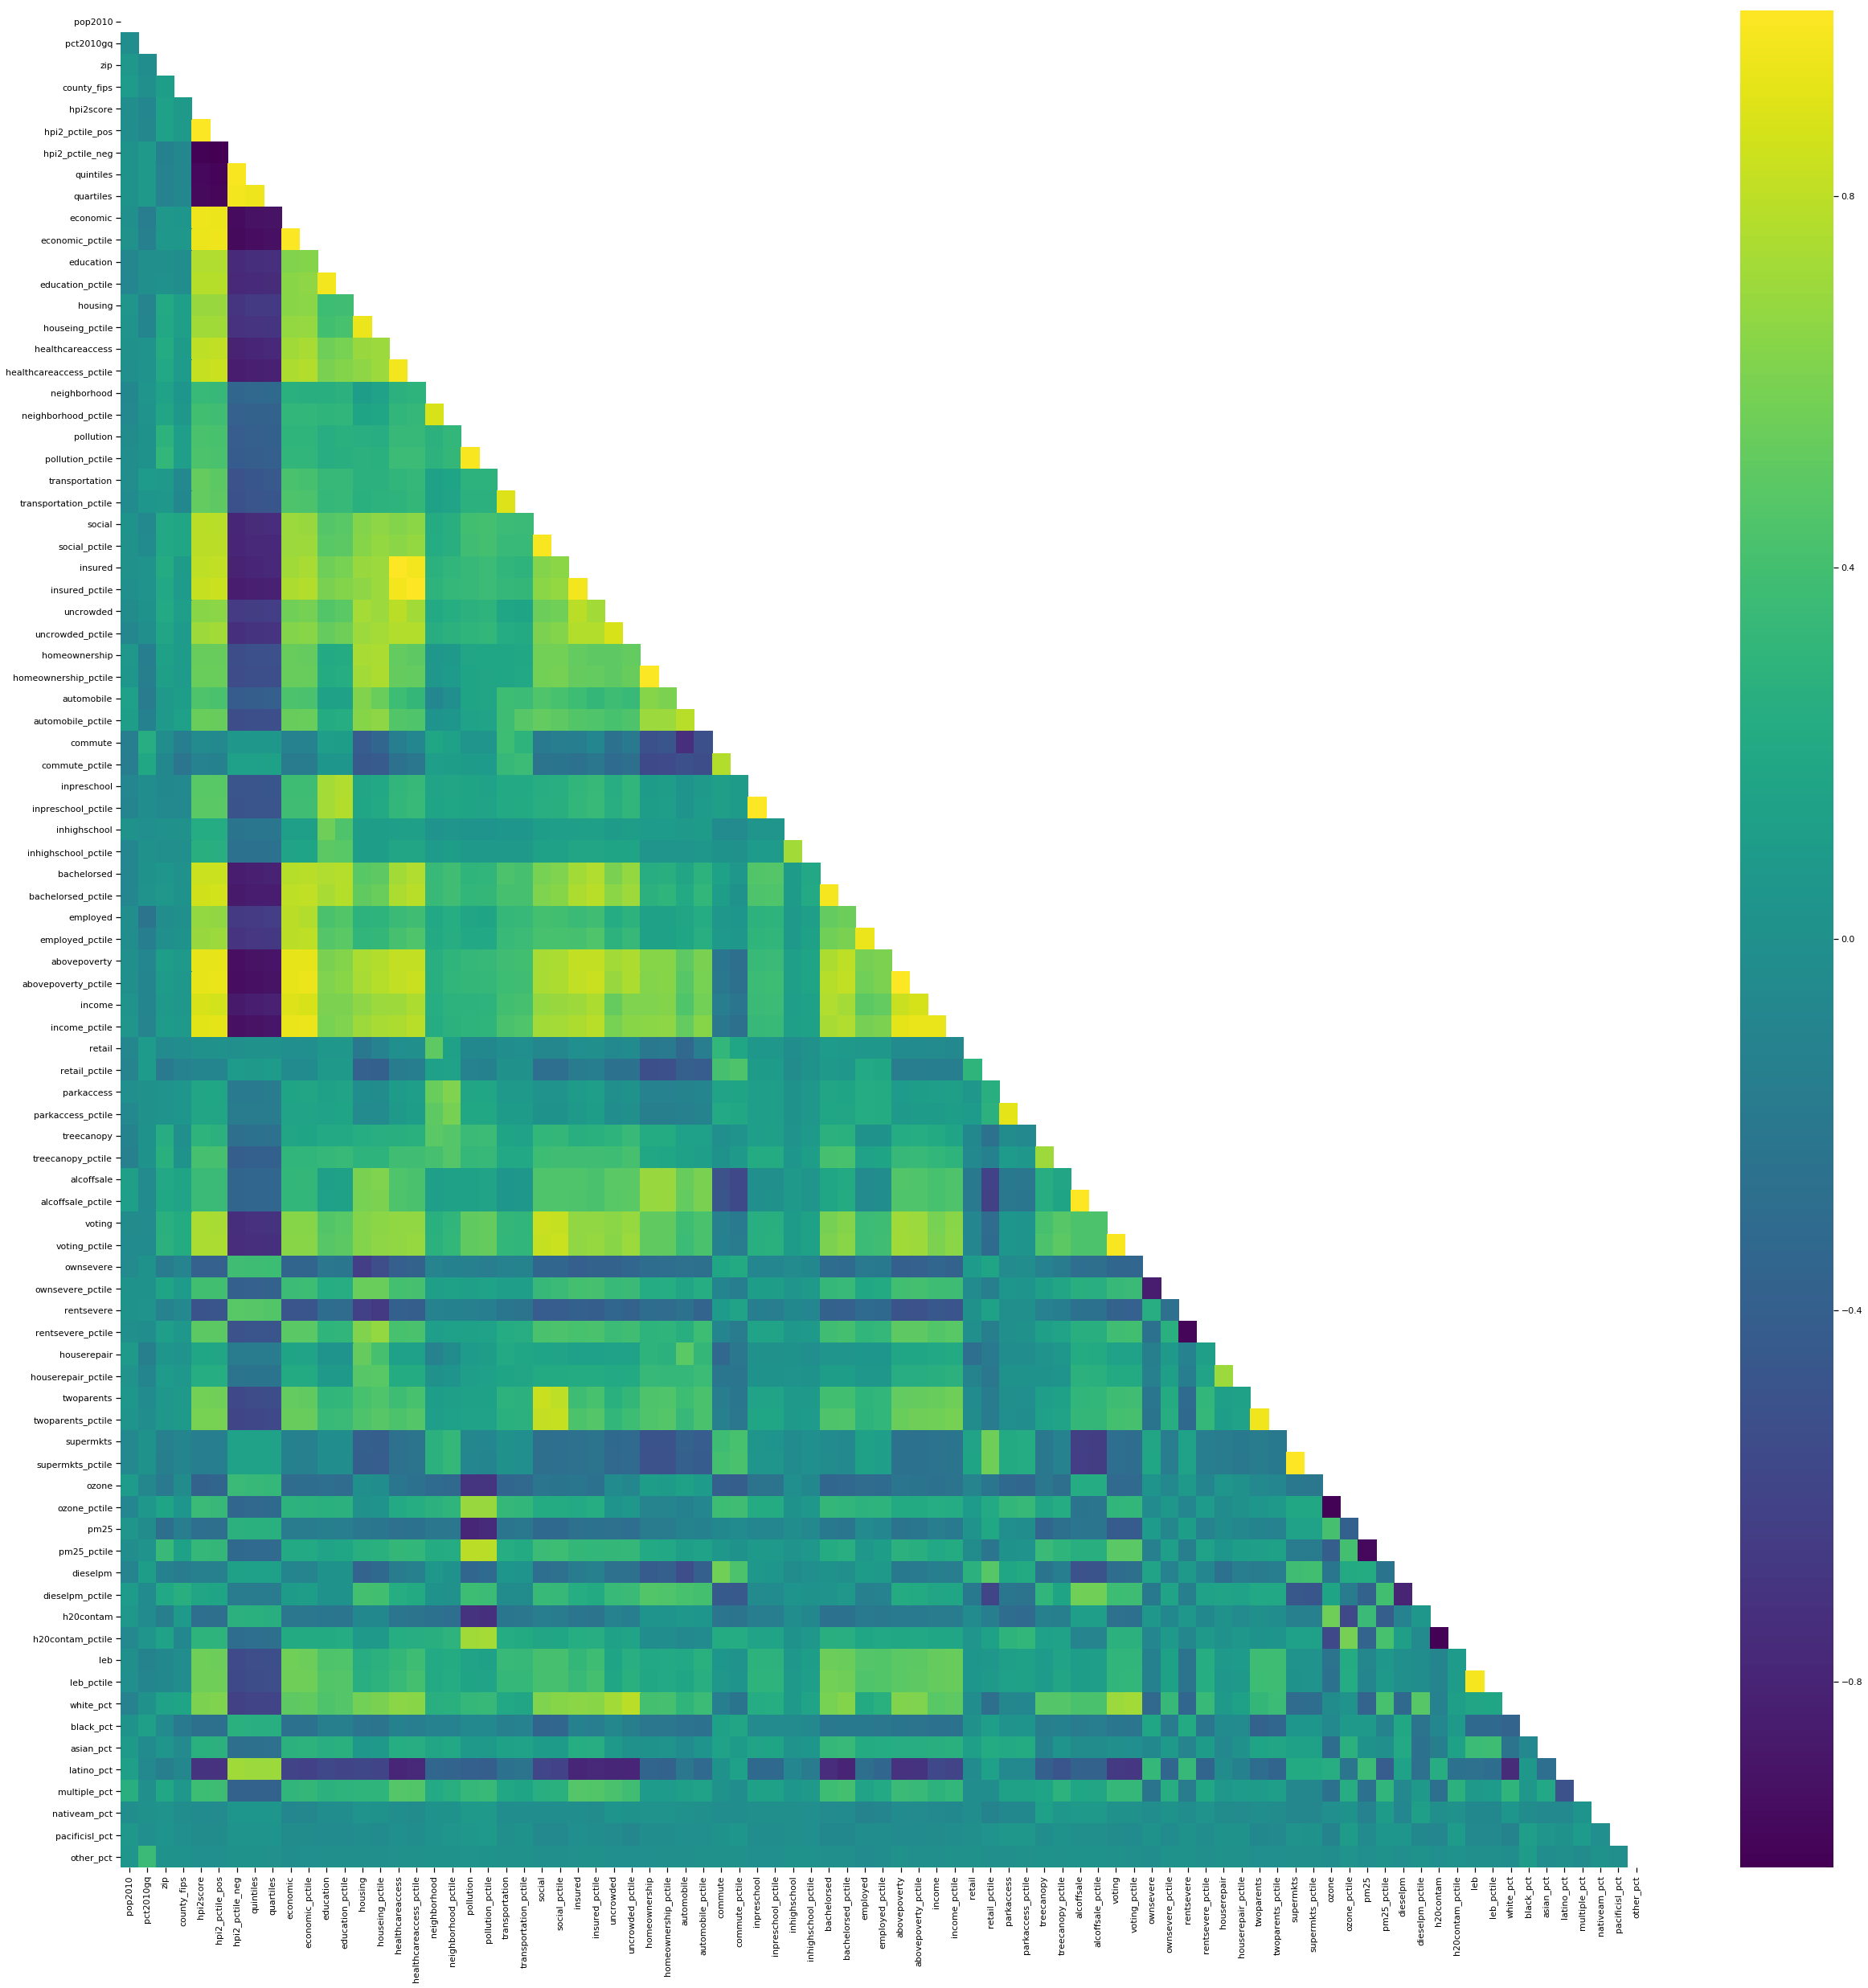

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

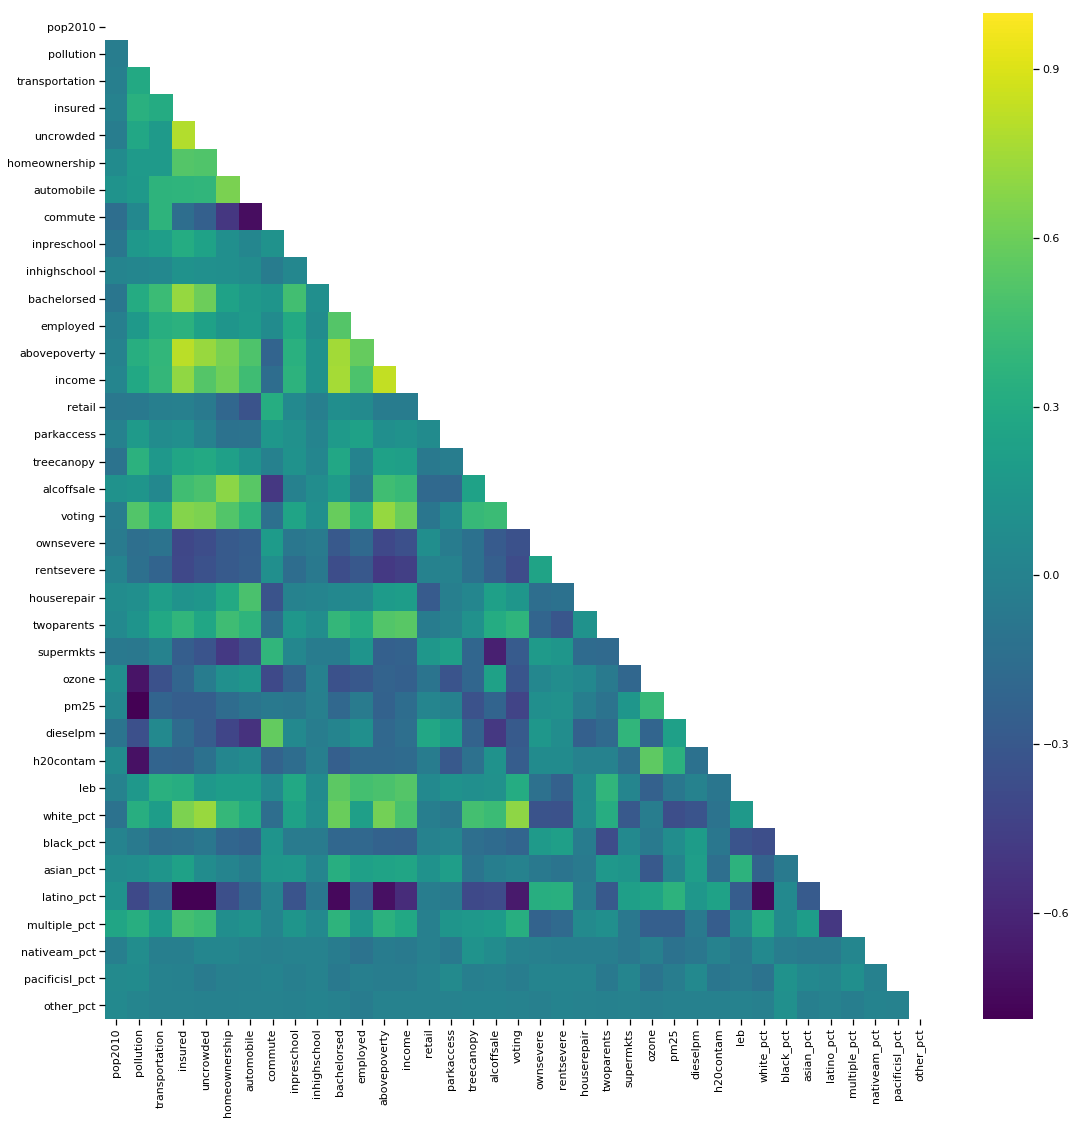

In [86]:
cor_cols = ['pop2010', 'pollution', 'transportation', 
 'insured', 'uncrowded', 'homeownership', 'automobile', 'commute', 'inpreschool', 'inhighschool', 
 'bachelorsed', 'employed', 'abovepoverty', 'income', 'retail', 'parkaccess', 'treecanopy', 'alcoffsale',
 'voting', 'ownsevere', 'rentsevere', 'houserepair', 'twoparents', 'supermkts', 'ozone', 'pm25', 'dieselpm', 
 'h20contam', 'leb', 'white_pct', 'black_pct', 'asian_pct', 'latino_pct', 'multiple_pct', 'nativeam_pct',
 'pacificisl_pct', 'other_pct']

cm = df[cor_cols].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(cor_cols),.5*len(cor_cols)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')  



In [87]:
#cm.stack().reset_index().drop_duplicates()

t = cm.stack().reset_index()

t['col1'] = t.apply(lambda r: sorted([r.level_0, r.level_1])[0], axis=1)
t['col2'] = t.apply(lambda r: sorted([r.level_0, r.level_1])[1], axis=1)
t = t[['col1','col2',0]]
t.columns = ['col1','col2','cor']
t = t.drop_duplicates()
t = t[t.cor < 1.0]
t.sort_values('cor',ascending=False)

,col1,col2,cor
457,abovepoverty,income,0.835315
123,abovepoverty,insured,0.815533
115,insured,uncrowded,0.790471
383,bachelorsed,income,0.760794
382,abovepoverty,bachelorsed,0.751373
160,abovepoverty,uncrowded,0.722626
177,uncrowded,white_pct,0.721209
121,bachelorsed,insured,0.718955
462,abovepoverty,voting,0.713962
124,income,insured,0.703482


# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 5 columns):
geoid           8057 non-null object
city            6972 non-null object
county_name     8057 non-null object
urbantype       8057 non-null object
hpi_top25pct    7793 non-null object
dtypes: object(5)
memory usage: 314.8+ KB


None

,count,unique,top,freq
geoid,8057,8057,14000US06071010015,1
city,6972,725,Los Angeles,999
county_name,8057,58,Los Angeles,2346
urbantype,8057,4,urban_area,7195
hpi_top25pct,7793,2,No,5844


# Nulls


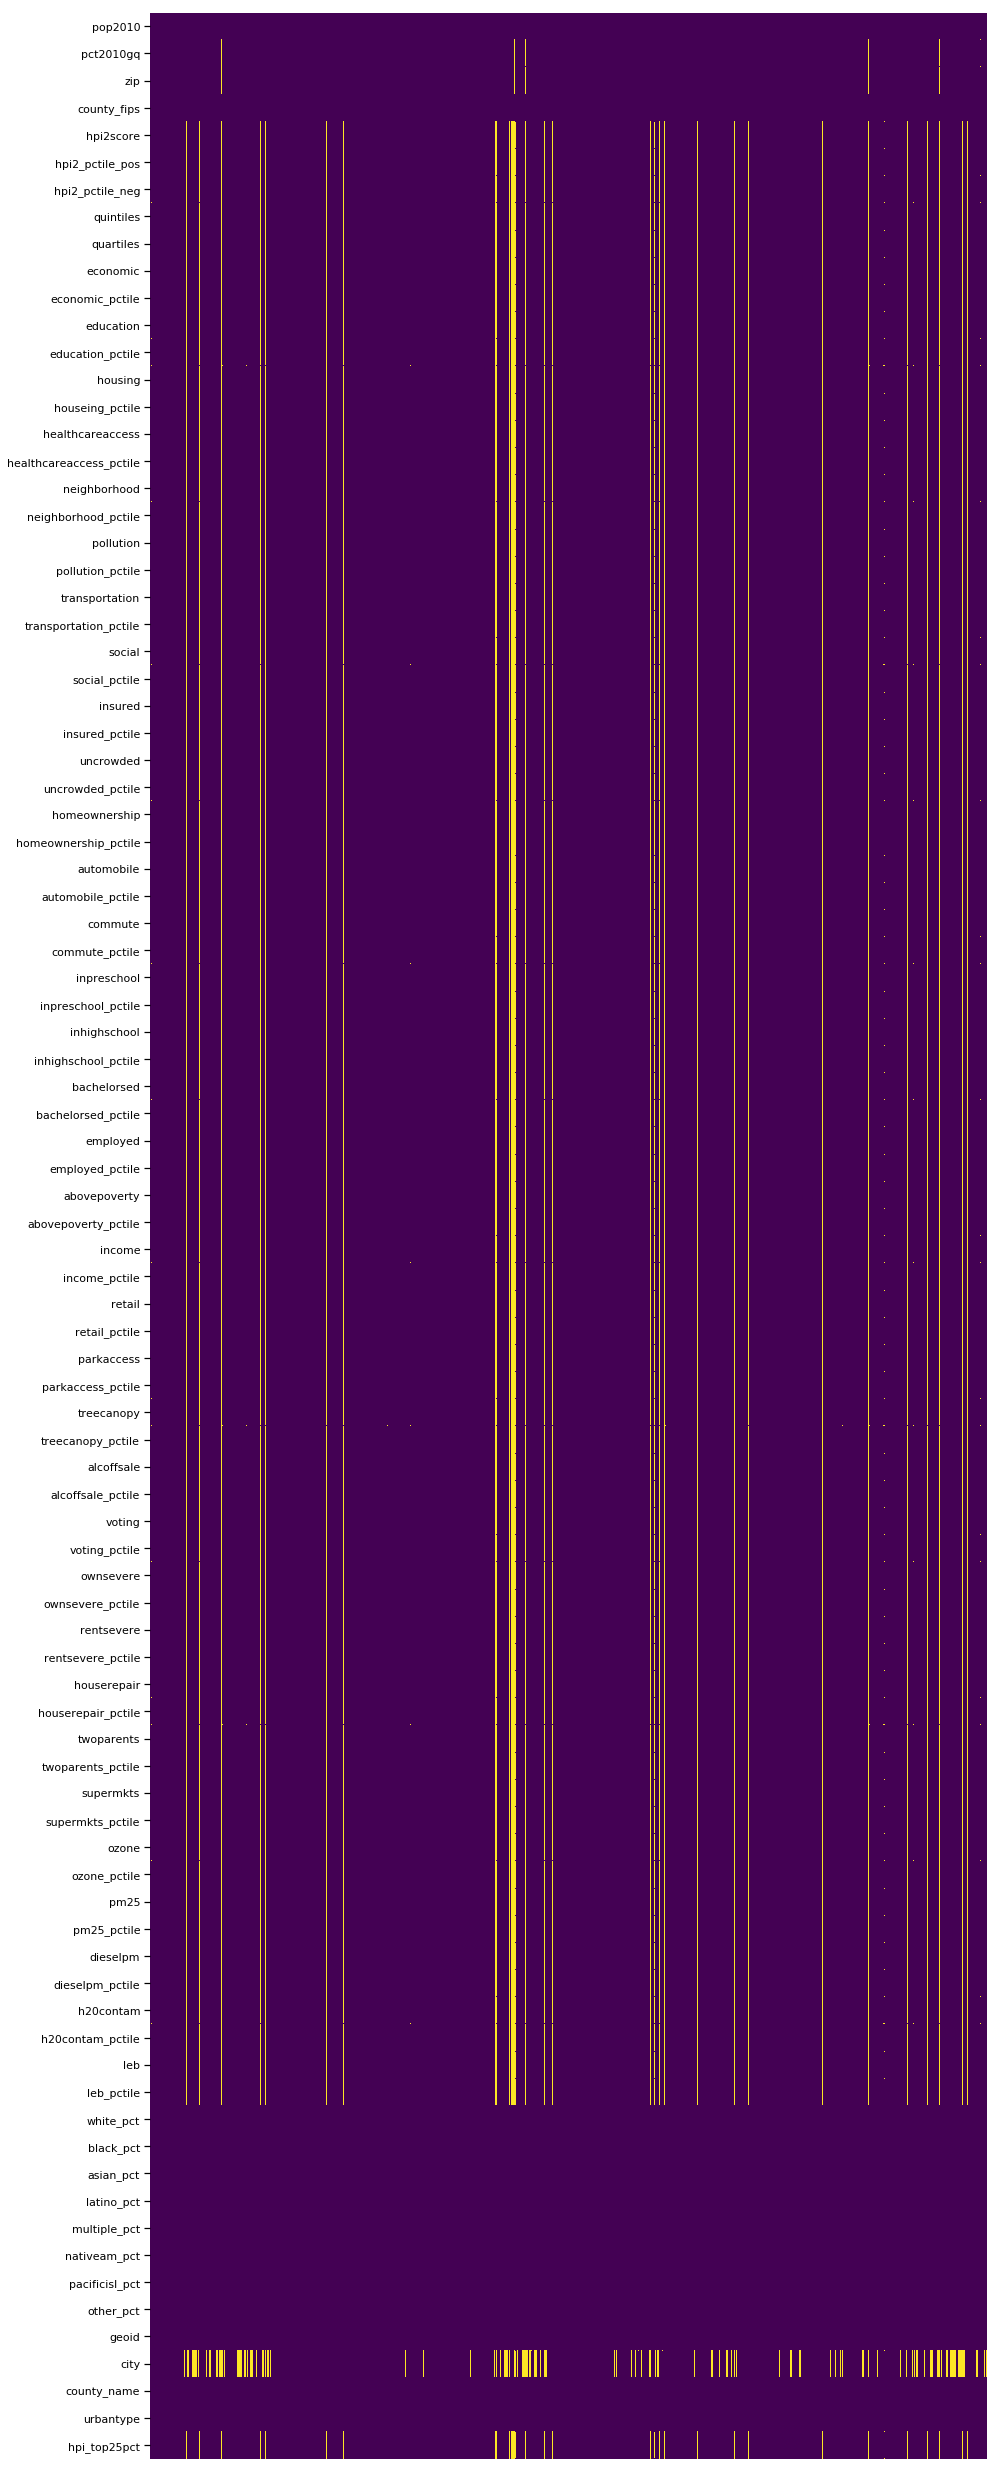

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )